# Switch from EUBUCCO to MSFT

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../code')
from functions import load_v01_vs_msft

In [61]:
df = gpd.read_file('../data/region_boundaries.gpkg')

/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/pyogrio/geopandas.py:261: UserWarning: More than one layer found in 'region_boundaries.gpkg': 'region_boundaries2' (default), 'region_boundaries'. Specify layer parameter to avoid this warning.
  result = read_func(


<AxesSubplot:>

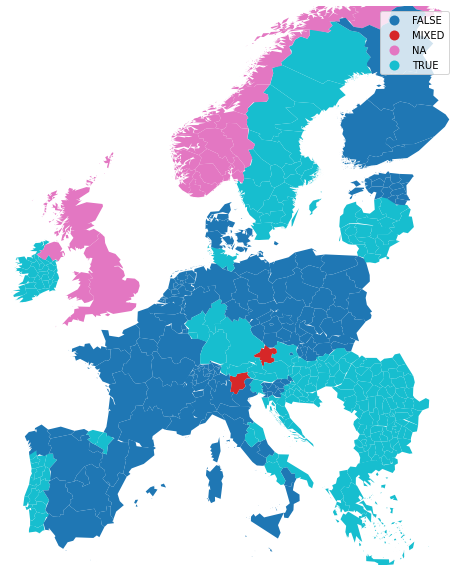

In [47]:
df = df.fillna('NA')
fig,ax = plt.subplots(figsize=(8,16))
plt.xlim(-11,32)
plt.ylim(35,70)
ax.set_axis_off()
df.plot(column='OSM',ax=ax,legend=True)

## Level 1: add Norway and UK

| Country        | Region                                             |
|:---------------|:---------------------------------------------------|
| United Kingdom | *Whole country*                                    |
| Norway         | *Whole country*                                    |

In [65]:
df[df.OSM=='NA'].drop(columns=['geometry','OSM']).to_csv('./planned-changes/osm2msft_na.csv',index=False)

## Level 2a: replace OSM with MSFT

### Regions with OSM fully to be replaced with MSFT

| Country        | Region                                             |
|:---------------|:---------------------------------------------------|
| Sweden         | *Whole country*                                    |
| Romania        | *Whole country*                                    |
| Croatia        | *Whole country*                                    |
| Italy          | Apulia                                             |
| Italy          | Campania                                           |
| Italy          | Friuli-Venezia Giulia                              |
| Italy          | Marche                                             |
| Italy          | Molise                                             |
| Italy          | Umbria                                             |
| Hungary        | *Whole country*                                    |
| Portugal       | *Whole country*                                    |
| Spain          | Comunidad Foral de Navarra                         |
| Spain          | País Vasco                                         |
| Latvia         | *Whole country*                                    |
| Ireland        | *Whole country*                                    |
| Germany        | Baden-Württemberg                                  |
| Germany        | Bayern                                             |
| Germany        | Bremen                                             |
| Germany        | Hessen                                             |
| Germany        | Rheinland-Pfalz                                    |
| Germany        | Saarland                                           |
| Germany        | Schleswig-Holstein                                 |
| Austria        | Burgenland                                         |
| Austria        | Kärnten                                            |
| Austria        | Niederösterreich                                   |
| Austria        | Salzburg                                           |
| Austria        | Steiermark                                         |
| Austria        | Tirol                                              |
| Austria        | Vorarlberg                                         |
| Greece         | *Whole country*                                    |
| Bulgaria       | *Whole country*                                    |
| Lithuania      | *Whole country*                                    |

Note: for Austria and several German states, OSM is very close to MSFT. So keeping OSM may be considered if more attributes are present. 


In [63]:
df[df.OSM=='TRUE'].drop(columns=['geometry','OSM']).to_csv('./planned-changes/osm2msft.csv',index=False)

## Level 2b: replace cities in regions with partial OSM coverage

| Country        | Region                | Explanation       |
|:---------------|:----------------------|-------------------|
| Austria        | Oberösterreich        | Linz available    |
| Italy          | Trentino-Alto Adige   | Alto Adige missing|

In [64]:
df[df.OSM=='MIXED'].drop(columns=['geometry','OSM']).to_csv('./planned-changes/osm2msft_mixed.csv',index=False)

## Level 3: replace govermnent if footprints are better


In [62]:
df_all = load_v01_vs_msft()
df_all = df_all[['region_msft','a_tot_msft','a_tot_v01']].groupby('region_msft').sum()
df = pd.merge(df_all,df,left_index=True,right_on='NAME_1')
df = df[df.OSM=='FALSE']
df['diff'] = (df['a_tot_msft'] - df['a_tot_v01']) /  df['a_tot_v01']
df = gpd.GeoDataFrame(df,geometry='geometry').reset_index(drop=True)

/home/nmd/Projects/mlup/eubucco-analysis/stock-analysis/../code/functions.py:32: DtypeWarning: Columns (60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_msft = pd.read_csv(f'../data/overview-msft/{country}_overview.csv')


In [74]:
df.at[108,'diff'] = 1

In [81]:
len(df[df['diff']>.1])

54

In [82]:
len(df[df['diff']>.2])

37

In [79]:
df[df['diff']>0.1].explore(column='diff')

In [78]:
df[df['diff']>0.2].explore(column='diff')

In [88]:
df[df['diff']<-0.2].explore(column='diff')

In [86]:
df[df['NAME_0']=='Czech Republic'].explore(column='diff')


## Level 4: replace government if heights are better

...